**ARCANGEL, KANE H.** \
Viral Social Media Trends Analysis

In [ ]:
#Importing the Google Drive folder for the dataset access
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import os

# Set the path to your desired folder in Google Drive
save_path = "/content/drive/MyDrive/Mini_Project/Social_Media_EDA_Charts"
os.makedirs(save_path, exist_ok=True)

Mounted at /content/drive


In [ ]:
#Checking if the drive mounted is the correct one by checking its contents
!cd /content/drive/MyDrive/Mini_Project/CSV ; ls

Cleaned_Viral_Social_Media_Trends.csv  Viral_Social_Media_Trends.csv


In [ ]:
#Importing the needed Python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Loading the dataset inside my drive
df = pd.read_csv('/content/drive/MyDrive/Mini_Project/CSV/Viral_Social_Media_Trends.csv')

**CLEANING AND PREPARING DATA**

In [ ]:
#Reading the first and last 5 data inside the dataset
df.head()

,Post_ID,Platform,Hashtag,Content_Type,Region,Views,Likes,Shares,Comments,Engagement_Level
0,Post_1,TikTok,#Challenge,Video,UK,4163464,339431,53135,19346,High
1,Post_2,Instagram,#Education,Shorts,India,4155940,215240,65860,27239,Medium
2,Post_3,Twitter,#Challenge,Video,Brazil,3666211,327143,39423,36223,Medium
3,Post_4,YouTube,#Education,Shorts,Australia,917951,127125,11687,36806,Low
4,Post_5,TikTok,#Dance,Post,Brazil,64866,171361,69581,6376,Medium


In [ ]:
df.tail()

,Post_ID,Platform,Hashtag,Content_Type,Region,Views,Likes,Shares,Comments,Engagement_Level
4995,Post_4996,YouTube,#Education,Video,Japan,4258236,381509,59209,4674,High
4996,Post_4997,Instagram,#Education,Video,UK,4841525,166266,54841,4832,Medium
4997,Post_4998,YouTube,#Fashion,Shorts,USA,2004080,32401,75229,33875,Low
4998,Post_4999,Instagram,#Gaming,Shorts,Canada,2221665,46996,12954,42832,Low
4999,Post_5000,Instagram,#Fashion,Reel,Japan,2224007,72744,29945,46381,Low


In [ ]:
#Summary statistics of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Views,5000.0,2.494066e+06,1.459490e+06,1266.0,1186207.25,2497373.0,3759781.00,4999430.0
Likes,5000.0,2.514750e+05,1.443496e+05,490.0,126892.25,249443.0,373970.75,499922.0
Shares,5000.0,5.051956e+04,2.906636e+04,52.0,25029.00,50839.5,75774.25,99978.0
Comments,5000.0,2.488839e+04,1.428450e+04,18.0,12305.25,25004.0,37072.75,49993.0


In [ ]:
# Show count and percentage of missing values per column (only columns with missing data), sorted by percentage descending
missing_counts = df.isnull().sum()
missing_percentages = (missing_counts / len(df)) * 100

missing_data = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing Percentage': missing_percentages
})

missing_data


,Missing Count,Missing Percentage
Post_ID,0,0.0
Platform,0,0.0
Hashtag,0,0.0
Content_Type,0,0.0
Region,0,0.0
Views,0,0.0
Likes,0,0.0
Shares,0,0.0
Comments,0,0.0
Engagement_Level,0,0.0


In [67]:
save_path = '/content/drive/MyDrive/Mini_Project/CSV/Cleaned_Viral_Social_Media_Trends.csv'
df_cleaned = df.dropna()
df_cleaned.to_csv(save_path, index=False)

print("Cleaned CSV saved to Google Drive.")

Cleaned CSV saved to Google Drive.


**ENGINEERING DATA ANALYSIS ON RELEVANT TOPICS**

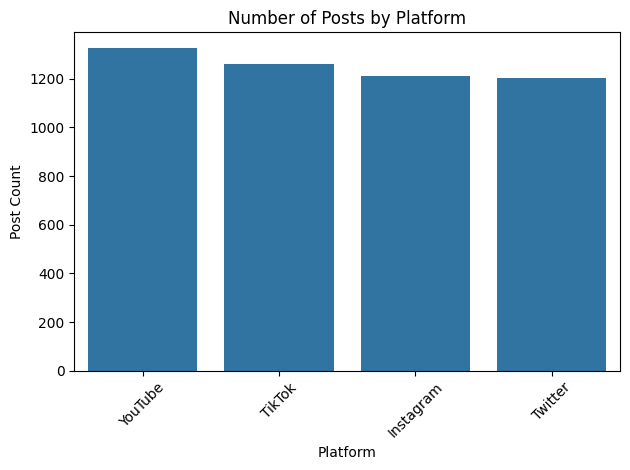

In [ ]:
#Number of post per platform
sns.countplot(data=df, x='Platform', order=df['Platform'].value_counts().index)
plt.title('Number of Posts by Platform')
plt.ylabel('Post Count')
plt.xlabel('Platform')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f"{save_path}/post_per_platform.png", dpi=300, bbox_inches='tight')
plt.show()

The dataset indicates that YouTube leads in the total number of viral posts, positioning it as a key platform for trend-driven content.

TikTok and Instagram follow closely, reflecting their strong presence in the viral content ecosystem.

Although Twitter ranks last among the four, its post count remains comparable—highlighting its ongoing role in real-time content sharing and engagement.

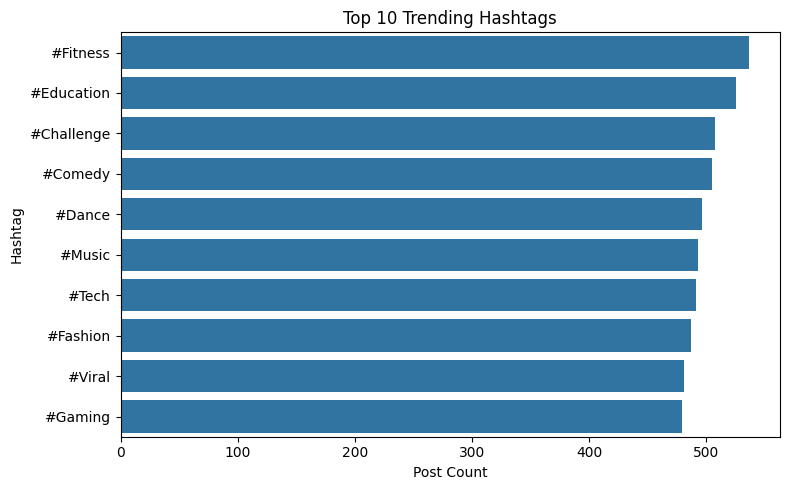

In [ ]:
#Top 10 Trending Hashtags
plt.figure(figsize=(8, 5))
top_hashtags = df['Hashtag'].value_counts().head(10)
sns.barplot(y=top_hashtags.index, x=top_hashtags.values)
plt.title('Top 10 Trending Hashtags')
plt.xlabel('Post Count')
plt.ylabel('Hashtag')
plt.tight_layout()
plt.savefig(f"{save_path}/trending_hashtags.png", dpi=300, bbox_inches='tight')
plt.show()

An analysis of hashtag trends reveals that #fitness leads as the most viral topic across platforms, reflecting a strong public interest in health and wellness content.

Following closely are themes such as #education, #challenge, and #comedy, which highlight the popularity of informative, interactive, and entertaining posts.

Hashtags like #dance, #music, #tech, and #fashion also rank highly, showcasing a blend of lifestyle, creative, and innovation-driven content.

Rounding out the list, #viral and #gaming emphasize the impact of trending topics and the growing influence of gaming culture in social media virality.

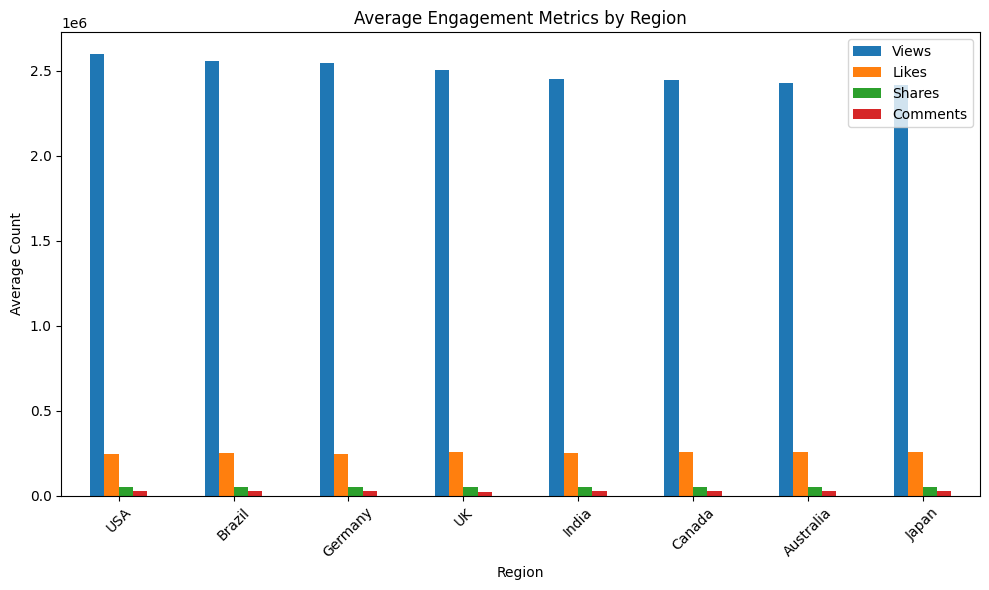

In [ ]:
#Average Engagement by Region
region_engagement = df.groupby('Region')[['Views', 'Likes', 'Shares', 'Comments']].mean().sort_values(by='Views', ascending=False)
region_engagement.plot(kind='bar', figsize=(10, 6))
plt.title('Average Engagement Metrics by Region')
plt.ylabel('Average Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f"{save_path}/average_engagement.png", dpi=300, bbox_inches='tight')
plt.show()


The dataset highlights the USA as the leading country in terms of overall social media engagement, followed by Brazil and Germany.

Other countries showing strong viral activity include the UK, India, Canada, and Australia, all ranking just below Germany.

Japan on the other hand is at the last and the country with the least engagement on social media platforms.

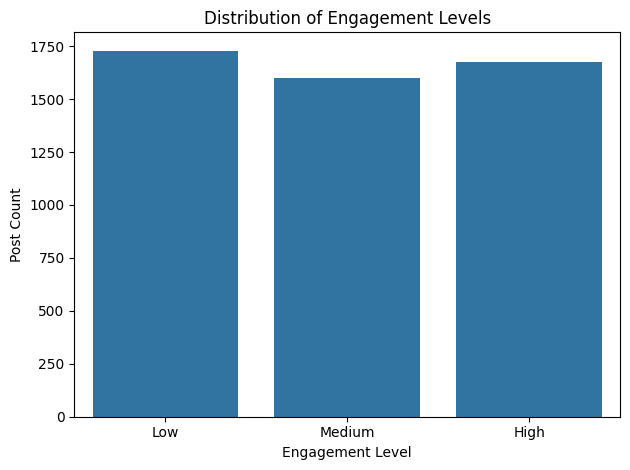

In [ ]:
#Engagement Level Distribution
sns.countplot(data=df, x='Engagement_Level', order=['Low', 'Medium', 'High'])
plt.title('Distribution of Engagement Levels')
plt.xlabel('Engagement Level')
plt.ylabel('Post Count')
plt.tight_layout()
plt.savefig(f"{save_path}/engagement_distribution_levels.png", dpi=300, bbox_inches='tight')
plt.show()

The dataset reveals that low engagement posts make up the majority of content across social media platforms.

High engagement posts, while less frequent, are the second most prevalent, indicating that a significant number of posts do go viral or receive strong attention.

Meanwhile, medium engagement posts account for a smaller share but still contribute meaningfully to overall activity.

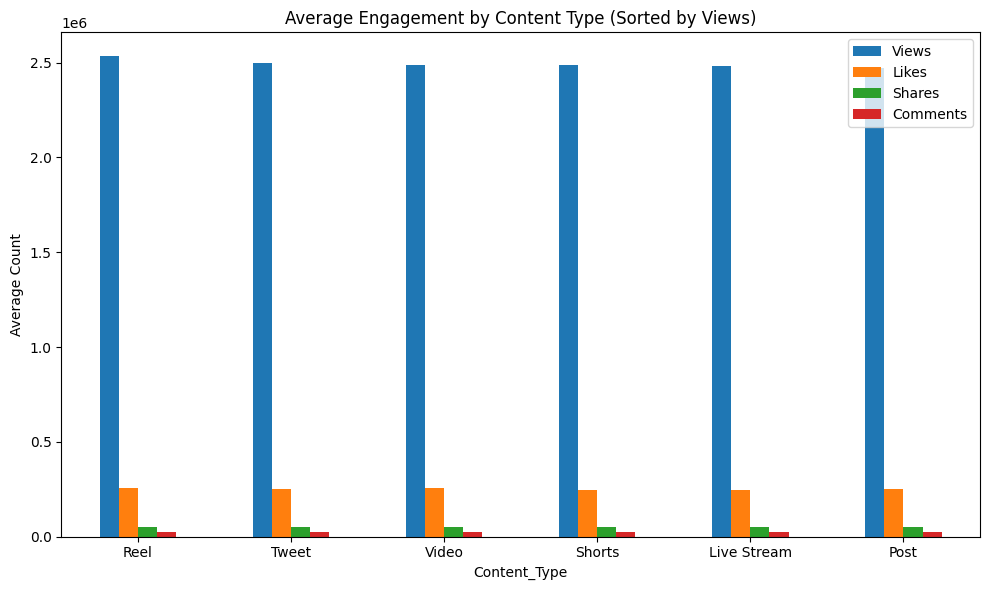

In [ ]:
#Average Engagement by Content Type
content_metrics = df.groupby('Content_Type')[['Views', 'Likes', 'Shares', 'Comments']].mean()
content_metrics = content_metrics.sort_values(by='Views', ascending=False)
content_metrics.plot(kind='bar', figsize=(10, 6))
plt.title('Average Engagement by Content Type (Sorted by Views)')
plt.ylabel('Average Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig(f"{save_path}/average_engagement_by_views.png", dpi=300, bbox_inches='tight')
plt.show()

The dataset reveals that Reels generate the highest average views, making them the most engaging content type on social media.

Close behind are Tweets, Videos, and Shorts, which also demonstrate strong viewer interest with relatively similar performance levels.

While Live Streams and traditional Posts rank lower in comparison, they still attract a considerable amount of engagement, indicating their continued relevance in content strategies.




**VIRAL SOCIAL MEDIA TRENDS SUMMARY**

*   The dataset shows that YouTube leads in viral post volume, followed by TikTok, Instagram, and Twitter.
*   #Fitness is the top trending hashtag, with others like #Education and #Tech also ranking highly, and hashtags like #Viral and #Gaming in the last.
*   Regionally, the USA has the highest engagement, followed by Brazil, Germany, and countries like the UK, India, Canada, and Australia, while Japan ranks lowest.
*   Low engagement posts are most common, though high and medium engagement levels still contribute significantly.

*   Among content types, Reels attract the highest views, with Tweets, Videos, and Shorts close behind, and Live Streams and Posts remaining relevant.